In [1]:
source("../src/utils/custom_tools.R")
setup_environment("../src/utils")

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”

In [21]:
impact <- read.table("../data/annotated_final_IMPACT_mutations_180508.txt",
                     sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [1]:
impact_annotated <- read.table("../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [3]:
colnames(impact)

[1] "Hugo_Symbol"             "Chromosome"             
 [3] "Start_Position"          "End_Position"           
 [5] "Consequence"             "Variant_Type"           
 [7] "Reference_Allele"        "Tumor_Seq_Allele2"      
 [9] "Tumor_Sample_Barcode"    "cDNA_change"            
[11] "HGVSp_Short"             "t_depth"                
[13] "t_vaf"                   "t_alt_count"            
[15] "n_depth"                 "n_vaf"                  
[17] "n_alt_count"             "t_ref_plus_count"       
[19] "t_ref_neg_count"         "t_alt_plus_count"       
[21] "t_alt_neg_count"         "confidence_class"       
[23] "sample_coverage"         "mut_key"                
[25] "VAG_VT"                  "VAG_GENE"               
[27] "VAG_cDNA_CHANGE"         "VAG_PROTEIN_CHANGE"     
[29] "VAG_EFFECT"              "VEP_Consequence"        
[31] "VEP_SYMBOL"              "VEP_HGVSc"              
[33] "VEP_HGVSp"               "VEP_Amino_acids"        
[35] "VEP_VARIANT_CLASS"       "VEP_EXON"               
[37] "VEP_INTRON"              "VEP_IMPACT"             
[39] "VEP_CLIN_SIG"            "VEP_COSMIC_CNT"         
[41] "VEP_gnomAD_AF"           "sample_mut_key"         
[43] "patient_key"             "frequency_in_normals"   
[45] "VEP_SIFT_class"          "VEP_SIFT_score"         
[47] "VEP_PolyPhen_class"      "VEP_PolyPhen_score"     
[49] "VEP_in_dbSNP"            "VEP_gnomAD_total_AF_AFR"
[51] "VEP_gnomAD_total_AF_AMR" "VEP_gnomAD_total_AF_ASJ"
[53] "VEP_gnomAD_total_AF_EAS" "VEP_gnomAD_total_AF_FIN"
[55] "VEP_gnomAD_total_AF_NFE" "VEP_gnomAD_total_AF_OTH"
[57] "VEP_gnomAD_total_AF_max" "VEP_gnomAD_total_AF"    
[59] "Kaviar_AF"               "is_a_hotspot"           
[61] "is_a_3d_hotspot"         "oncogenic"              
[63] "gene_type"

In [4]:
get_table(impact$confidence_class)

values,count,freq
AUTO_OK,180832,93.1%
UNLIKELY,7199,3.7%
MANUAL_OK,6180,3.2%
-- total --,194211,100%


In [22]:
impact$class <- "somatic"
impact$class[impact$confidence_class == "UNLIKELY"] <- "non-somatic"
get_table(impact$class)

values,count,freq
somatic,187012,96.3%
non-somatic,7199,3.7%
-- total --,194211,100%


In [23]:
nrow(impact[impact$mut_key %in% impact$mut_key[impact$class == "somatic"] &
                    impact$class == 'non-somatic' &
                    impact$oncogenic %in% c("Oncogenic",
                                            "Likely Oncogenic",
                                            "Predicted Oncogenic"),])

[1] 560

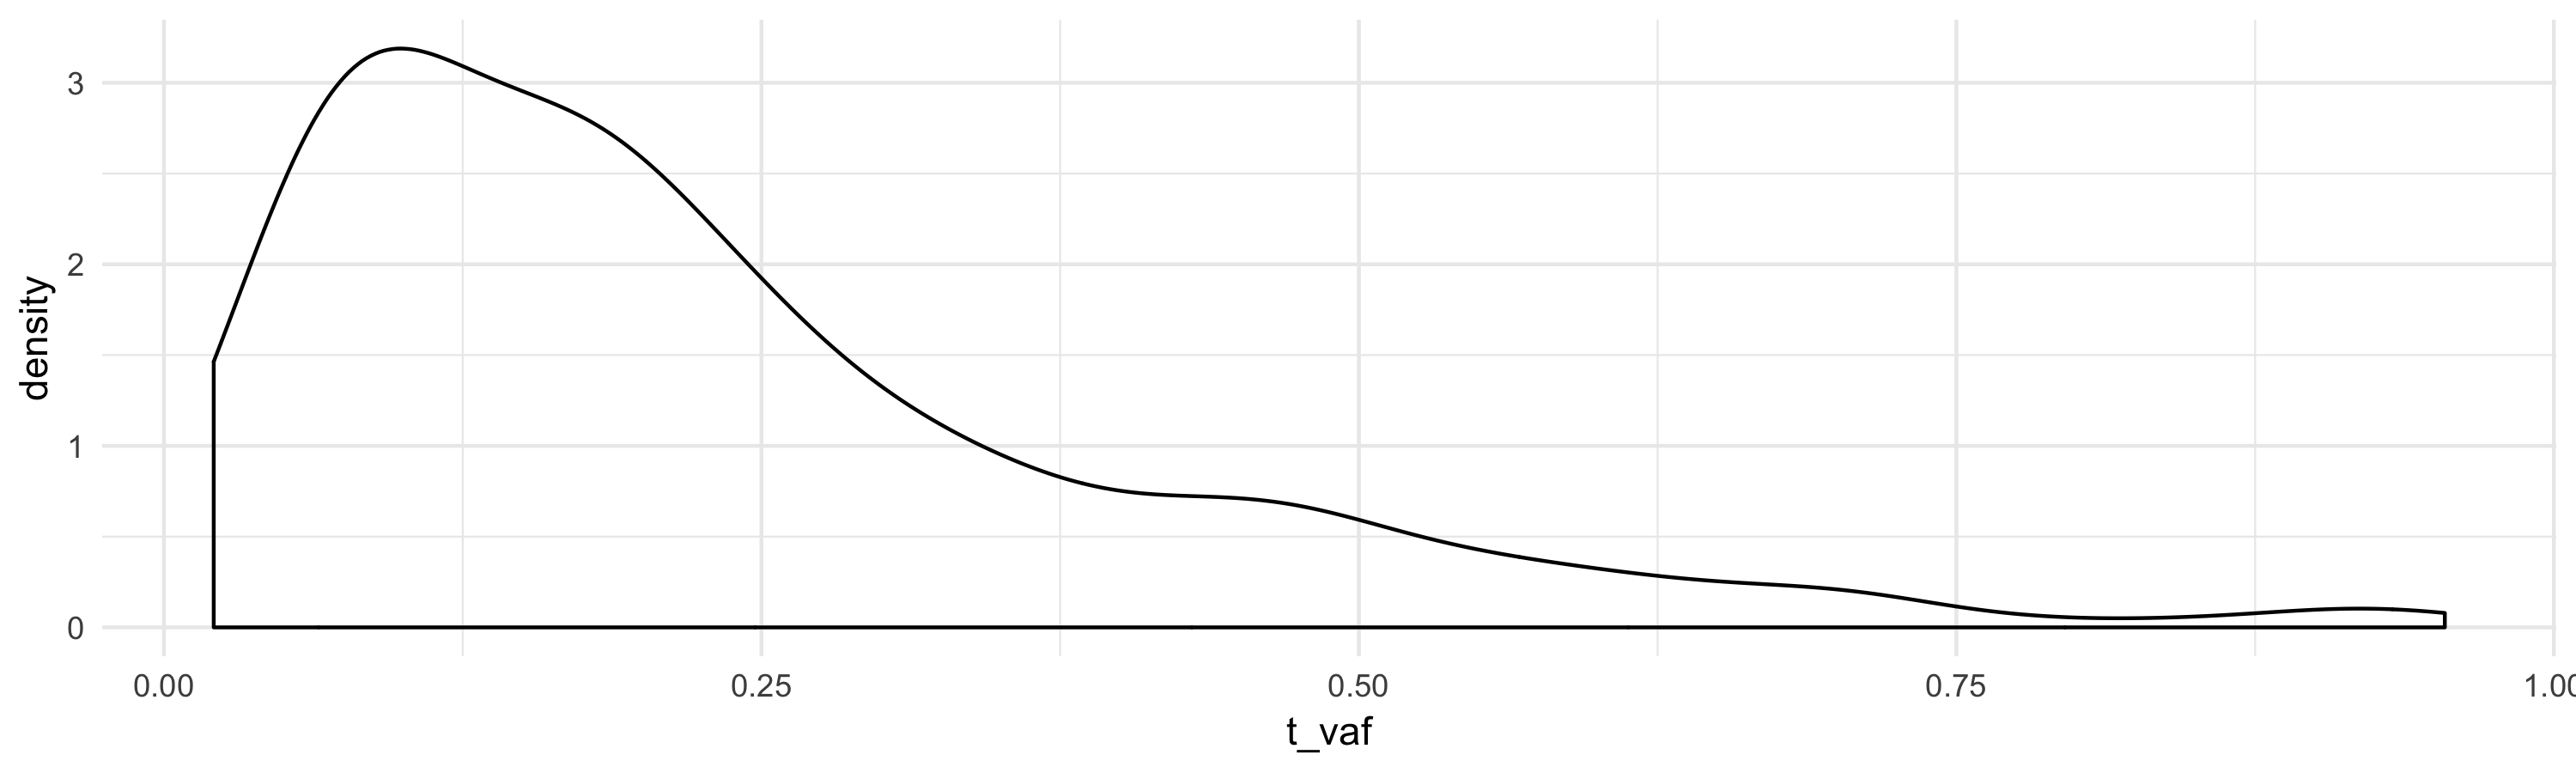

In [24]:
plot_density(impact[impact$mut_key %in% impact$mut_key[impact$class == "somatic"] &
                    impact$class == 'non-somatic' &
                    impact$oncogenic %in% c("Oncogenic",
                                            "Likely Oncogenic",
                                            "Predicted Oncogenic"),], "t_vaf")

In [30]:
get_table(impact$Hugo_Symbol[impact$mut_key %in% impact$mut_key[impact$class == "somatic"] &
                    impact$class == 'non-somatic' &
                    impact$oncogenic %in% c("Oncogenic",
                                            "Likely Oncogenic",
                                            "Predicted Oncogenic") &
                   impact$t_vaf > 0.4 & impact$t_vaf < 0.6])

values,count,freq
TP53,10,15.9%
KIT,7,11.1%
TCF7L2,6,9.5%
MLL3,5,7.9%
EGFR,5,7.9%
APC,5,7.9%
ASXL1,4,6.3%
RAD50,3,4.8%
RAD52,2,3.2%
FOXA1,2,3.2%
